#AVL - Insert

Realizar el análisis de complejidad.

Realizar un análisis cualitativo de la solución.

[459, 2, 270, 270, 356, 363, 58, 78, 327, 216]
--- 6.818771362304688e-05 seconds --- 

[403, 405, 16, 258, 450, 396, 96, 71, 205, 287]
--- 6.103515625e-05 seconds --- 

[60, 174, 38, 436, 267, 309, 231, 119, 194, 399]
--- 6.389617919921875e-05 seconds --- 

[301, 405, 124, 445, 48, 11, 186, 287, 403, 400]
--- 5.745887756347656e-05 seconds --- 

[159, 439, 157, 401, 449, 183, 204, 351, 21, 335]
--- 6.771087646484375e-05 seconds --- 

[90, 237, 292, 435, 96, 499, 216, 200, 64, 479]
--- 6.008148193359375e-05 seconds --- 

[161, 426, 384, 234, 369, 230, 387, 412, 306, 351]
--- 7.271766662597656e-05 seconds --- 

[372, 468, 27, 123, 40, 362, 399, 363, 56, 158]
--- 6.175041198730469e-05 seconds --- 

[226, 228, 188, 178, 106, 168, 363, 306, 49, 275]
--- 6.842613220214844e-05 seconds --- 

[89, 79, 239, 449, 324, 83, 486, 189, 45, 392]
--- 5.5789947509765625e-05 seconds --- 

[238, 250, 332, 132, 287, 294, 64, 283, 367, 319]
--- 6.29425048828125e-05 seconds --- 

[245, 369, 365, 387, 289, 171

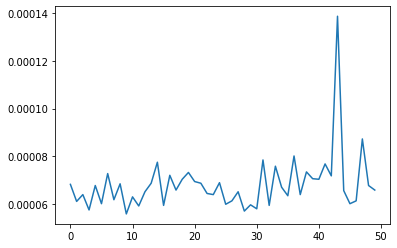

{0: 6.818771362304688e-05, 1: 6.103515625e-05, 2: 6.389617919921875e-05, 3: 5.745887756347656e-05, 4: 6.771087646484375e-05, 5: 6.008148193359375e-05, 6: 7.271766662597656e-05, 7: 6.175041198730469e-05, 8: 6.842613220214844e-05, 9: 5.5789947509765625e-05, 10: 6.29425048828125e-05, 11: 5.91278076171875e-05, 12: 6.508827209472656e-05, 13: 6.866455078125e-05, 14: 7.748603820800781e-05, 15: 5.936622619628906e-05, 16: 7.200241088867188e-05, 17: 6.580352783203125e-05, 18: 7.033348083496094e-05, 19: 7.319450378417969e-05, 20: 6.937980651855469e-05, 21: 6.866455078125e-05, 22: 6.437301635742188e-05, 23: 6.389617919921875e-05, 24: 6.890296936035156e-05, 25: 5.984306335449219e-05, 26: 6.127357482910156e-05, 27: 6.508827209472656e-05, 28: 5.698204040527344e-05, 29: 5.9604644775390625e-05, 30: 5.793571472167969e-05, 31: 7.843971252441406e-05, 32: 5.936622619628906e-05, 33: 7.581710815429688e-05, 34: 6.699562072753906e-05, 35: 6.341934204101562e-05, 36: 8.0108642578125e-05, 37: 6.389617919921875e-0

In [ ]:
import sys
class TreeNode(object):
    def __init__(self, num):
        self.num = num
        self.left = None
        self.right = None
        self.height = 1


class AVLTree(object):

    # Function to insert a node
    def insert_node(self, root, num): #t(n/2)

        # Find the correct location and insert the node
        if not root:
            return TreeNode(num)
        elif num < root.num:
            root.left = self.insert_node(root.left, num)
        else:
            root.right = self.insert_node(root.right, num)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if num < root.left.num:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if num > root.right.num:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to perform left rotation
    def leftRotate(self, z):  #todas son O(1)
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):  #todas son O(1)
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

 # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.num), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

   
    def printAVL(self,currPtr):
        if currPtr !=None:
            print("*")
            print(currPtr.num)
            print("<")
            self.printAVL(currPtr.left)
            print(">")
            self.printAVL(currPtr.right)

import matplotlib.pyplot as plt
import numpy as np
import time as t
import random

times= {}

def test(x,y):
  #random array of x values
  ar=[]

  for c in range(x):
    ar.append(random.randint(0,500))
  
  print(ar)
  start= t.time()
  
  myTree = AVLTree()
  root = None
  for num in ar:
      root = myTree.insert_node(root, num)
  # myTree.printAVL(root)

  times[y]=t.time()-start

  print("--- %s seconds --- \n" % (times[y]))


def plot(times):
  lists = sorted(times.items())
  x, y = zip(*lists)
  plt.plot(x, y)
  plt.show()
  print(times)

for i in range(50):
  test(10,i)

plot(times)

#Analisis de Complejidad 
Como lo comentado en clase la funcion de inser como tal consta de varias partes siendo ellas el agregar el nodo, verificar si esta balanceado, y todas las opciones de balanceo que hay. Se sabe que todas las funciones de balanceo y funciones de ayuda para saber su altura son constantes osea O(1). En la parte de agregar se sabe que es de t(n/2) y para encontrar su complejidad tendriamos que sumar todas las funciones siendo T(n/2)+O(1), si aplicamos el master method 
a=1

b=2

d=0

2= 2^1 case 1

dando asi la complejidad de O(logN)


#Analisis Cualitativo
El algoritmo como tal es un poco tricky ya que como lo comentado en clase, hay que analisar como tal que conlleva la funcion de insertar a un arbol avl. En la funcion de insertar se hace de manera normal al principio se recore los nodos hasta encontrar su posicion y se inserta siendo la insercion complejidad de n/2, a diferencia del binario en este caso se toma en cuenta el tamano de los hijos y si hay diferencia de 2 en tamano se debe balancear y mover los nodos de posicion. Existen balanceos simples y dobles, en terminos de complejidad estas funciones mas que todo son de declaracion de variables siendo asi constantes lo cual no afectan tanto el algoritmo. Y asi se hace la sumatoria final de complejidad de O(LogN)